In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("./datasetes/credit/creditcard.csv", low_memory=False)
# df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   58563.0  1.135369  0.469210  1.210951  2.586250 -0.643204 -0.495586   
1  161690.0 -0.309358 -0.927249  0.121460 -2.998590  0.231734 -0.498238   
2   74806.0 -0.308182  0.596041  1.476783  0.144043 -0.216841 -0.100467   
3  133070.0 -0.613419  0.180235  0.801833 -0.418590  0.488010  0.554134   
4   49965.0 -1.543238  1.491762  0.714397 -0.756657 -0.460294 -0.225442   

         V7        V8        V9  ...         V21       V22       V23  \
0 -0.193701 -0.042874 -0.515670  ...    0.138939  0.389306 -0.005171   
1 -0.274123 -0.098303 -1.729217  ...   -0.076128  0.085571  0.059067   
2  0.304247 -0.111437 -1.745713  ...   -0.212071 -0.045430  0.014398   
3  0.087930  0.114371  0.947902  ...    0.003537  0.237389 -0.182922   
4 -0.125885  1.086177 -0.433652  ...   -0.058679 -0.180161  0.051298   

        V24       V25       V26       V27       V28  Amount  Class  
0  0.712671  0.375665  0.047342  0.014089  0.034463    7.55      0  
1  0.042736 -0.615404 -0.382501  0.041519  0.280169   25.00      0  
2  0.069243 -0.530685 -0.410645  0.101699  0.176868   20.77      0  
3 -0.051570 -0.919172 -0.504011 -0.081727 -0.009645   74.82      0  
4  0.035290 -0.213853  0.314645  0.172725  0.100800    4.00      0  

[5 rows x 31 columns]

In [20]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


In [21]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [22]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 172 0.001725469739072861
Number of frauds on y_train: 320 0.0017285711198980144


In [23]:
(99683-176)/176

565.3806818181819

In [24]:
import EnhancedForest
import time
import datetime
import importlib
import numpy as np
importlib.reload(EnhancedForest)

<module 'EnhancedForest' from 'C:\\github_workspace\\ecoForest\\EnhancedForest.py'>

In [25]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)
def roc_metrix_mult(a, p):
#     print(p)
    if len(set(a)) == 1:
#         return "acc", metrics.accuracy_score(a, p)
        return "acc", len(a) - len(np.where(a == p)[0])
    return "roc", metrics.roc_auc_score(a, p)
def confusion_matrix_mult(a, p):
    if len(set(a)) == 1:
        return len(a), len(a) - len(np.where(a == p)[0])
    return metrics.confusion_matrix(a, p)

In [28]:
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_data_mask = np.array([False] * len(X_test))
data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

enhancedDTree = EnhancedForest.EnhancedForest(len(X_train), len(X_test), isLRStacker=False)
counter = 0
early_stop = 0
early_stop_up = 0

while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, data_mask, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_data_mask, test_y, real_y, verbose=False, \
                                      feval=roc_metrix_mult, dropout=None, criterion='gini', random_state=layer, \
                                      isFirst=isFirst, min_samples_leaf=10\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    
    # 打印信息
    pass_data_id = data_mask[data_mask==True]
#     all_false_data_index = np.where(all_data_mask == False)[0]
    all_false_data_index = np.where(all_data_mask == False)[0]
    X_test_np = X_test[all_false_data_index]
    print("%d [p:%d,1:%d/np:%d] " % (layer, len(pass_data_id),\
                                      len(np.where(y_train_np == 1)[0]), \
                                      len(X_test_np) - len(pass_data_id)))#, end="")
    ### stackplot
    pass_data_len.append(len(pass_data_id))
    pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(pass_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~data_mask]
#     test_y[tmp_all_data_mask] = p_test[~data_mask]
    tmp_test_loss = metrics.roc_auc_score(y_test, test_y)
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
    best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    if len(pass_data_rate_lt) == 0:
        pass_data_rate_lt.append(len(data_mask[data_mask==True])/len(X_test))
        pass_data_rate_train_lt.append(0)
    else:
        pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(data_mask[data_mask==True])/len(X_test))
        pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
    if layer > maxlayer or early_stop > 5:
        break
        
    all_data_mask[~all_data_mask] = data_mask


layer: 1


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:0/1:0|n:185124/1:320] 
test loss: y_true 99683 99683, y_pred:99683 99683
1 [p:0,1:320/np:99683] 
train loss ('roc', 0.99768279839722085)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.96096496152680677)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.98480695601491286)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-23 14:32:09
best test loss: 0.984806956015

layer: 2


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:2/1:2|n:185122/1:318] test loss: y_true 99683 99683, y_pred:99683 99683
2 [p:0,1:318/np:99683] 
train loss ('roc', 0.99818542550485923)
pass train loss ('acc', 2)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96229424992153856)
pass vaild loss ('acc', 2)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98452113976881839)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-23 14:32:39
best test loss: 0.984521139769

layer: 3


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:6/1:6|n:185116/1:312] test loss: y_true 99683 99683, y_pred:99683 99683
3 [p:0,1:312/np:99683] 
train loss ('roc', 0.9978636656944655)
pass train loss ('acc', 8)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.9616861478918205)
pass vaild loss ('acc', 8)
pass vaild loss now ('acc', 6)
test loss ('roc', 0.98400837070016567)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-23 14:33:08
best test loss: 0.9840083707

layer: 4


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:3/1:3|n:185113/1:309] test loss: y_true 99681 99683, y_pred:99681 99683
4 [p:2,1:309/np:99681] 
train loss ('roc', 0.99879277504815922)
pass train loss ('acc', 11)
pass train loss now ('acc', 3)
vaild loss ('roc', 0.96364949487024087)
pass vaild loss ('acc', 11)
pass vaild loss now ('acc', 3)
test loss ('roc', 0.98376164093580398)
pass test loss ('acc', 2)
pass test loss now ('acc', 2)
2018-03-23 14:33:38
best test loss: 0.983761640936

layer: 5


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:8/1:8|n:185105/1:301] test loss: y_true 99679 99683, y_pred:99679 99683
5 [p:2,1:301/np:99679] 
train loss ('roc', 0.99857555166554834)
pass train loss ('acc', 19)
pass train loss now ('acc', 8)
vaild loss ('roc', 0.97077067967955255)
pass vaild loss ('acc', 19)
pass vaild loss now ('acc', 8)
test loss ('roc', 0.98457813358485791)
pass test loss ('acc', 4)
pass test loss now ('acc', 2)
2018-03-23 14:34:07
best test loss: 0.984578133585

layer: 6


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:0/1:0|n:185105/1:301] test loss: y_true 99679 99683, y_pred:99679 99683
6 [p:0,1:301/np:99679] 
train loss ('roc', 0.9988975820328565)
pass train loss ('acc', 19)
pass train loss now (0, 0)
vaild loss ('roc', 0.96483528664152296)
pass vaild loss ('acc', 19)
pass vaild loss now (0, 0)
test loss ('roc', 0.9832959333933633)
pass test loss ('acc', 4)
pass test loss now (0, 0)
2018-03-23 14:34:37
best test loss: 0.983295933393

layer: 7


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:1/1:1|n:185104/1:300] test loss: y_true 99679 99683, y_pred:99679 99683
7 [p:0,1:300/np:99679] 
train loss ('roc', 0.99851090547282528)
pass train loss ('acc', 20)
pass train loss now ('acc', 1)
vaild loss ('roc', 0.96935254715807018)
pass vaild loss ('acc', 20)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98332608081425155)
pass test loss ('acc', 4)
pass test loss now (0, 0)
2018-03-23 14:35:07
best test loss: 0.983326080814

layer: 8


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:1/1:1|n:185103/1:299] test loss: y_true 99678 99683, y_pred:99678 99683
8 [p:1,1:299/np:99678] 
train loss ('roc', 0.9959529589456938)
pass train loss ('acc', 21)
pass train loss now ('acc', 1)
vaild loss ('roc', 0.96453474863909872)
pass vaild loss ('acc', 21)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98363176164000099)
pass test loss ('acc', 5)
pass test loss now ('acc', 1)
2018-03-23 14:35:36
best test loss: 0.98363176164

layer: 9


C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\github_workspace\ecoForest\EnhancedForest.py:100: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:101: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:106: RuntimeWarning: invalid value encountered in true_divide
  # node_id_score = 2*node_id_freq*node_id_lift/(node_id_freq+node_id_lift)
C:\git

[train - p:0/1:0|n:185103/1:299] test loss: y_true 99678 99683, y_pred:99678 99683
9 [p:0,1:299/np:99678] 
train loss ('roc', 0.99759118106209832)
pass train loss ('acc', 21)
pass train loss now (0, 0)
vaild loss ('roc', 0.96036857799344166)
pass vaild loss ('acc', 21)
pass vaild loss now (0, 0)
test loss ('roc', 0.98546672297301241)
pass test loss ('acc', 5)
pass test loss now (0, 0)
2018-03-23 14:36:06
best test loss: 0.985466722973


In [35]:
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
# >>> for train_index, test_index in skf.split(X, y):
tuple(skf.split(X, y))

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


((array([1, 3]), array([0, 2])), (array([0, 2]), array([1, 3])))

In [15]:
pass_data_rate_lt

[0.0,
 0.9816117091179037,
 0.9838688642998304,
 0.9853535708194978,
 0.9860257014736715,
 0.986266464693077,
 0.9865272915140997,
 0.986747991131888,
 0.9869586589488679,
 0.9870790405585707,
 0.9871994221682734,
 0.9875003761925303,
 0.9876006942006159,
 0.9877010122087015,
 0.9877311076111273,
 0.9877912984159787,
 0.9878213938184044,
 0.9878514892208301,
 0.9879518072289157,
 0.9879919344321499,
 0.9880220298345757,
 0.9880521252370014,
 0.9880922524402356,
 0.9882527612531726,
 0.988312952058024,
 0.9883530792612583,
 0.9884333336677268,
 0.9884533972693439,
 0.9884834926717696,
 0.9885336516758124,
 0.9885637470782381,
 0.988613906082281,
 0.9887242558911752,
 0.9887543512936009,
 0.9887643830944095,
 0.9888245738992609,
 0.9888346057000695,
 0.9888647011024952,
 0.988894796504921,
 0.9889048283057296,
 0.9889449555089638,
 0.988985082712198,
 0.9890051463138151,
 0.9890252099154322,
 0.9890352417162408,
 0.9890553053178579,
 0.9890653371186665,
 0.9891154961227093,
 0.9891455915

In [17]:
pass_data_rate_train_lt

[0,
 0.9826872798772714,
 0.9848101812838962,
 0.9862308506730624,
 0.9869654933990191,
 0.9873490201162465,
 0.9876353147079796,
 0.9878405825284675,
 0.9880566539184548,
 0.9881592878286987,
 0.9883807610034356,
 0.988629243101921,
 0.9887102698731662,
 0.988748082366414,
 0.9887750912901624,
 0.9888723234156567,
 0.9888993323394051,
 0.9889479484021522,
 0.9890451805276465,
 0.9890775912361446,
 0.9891100019446427,
 0.989120805514142,
 0.9891478144378905,
 0.9892666537023834,
 0.9892990644108816,
 0.9893206715498802,
 0.9894827250923707,
 0.9895151358008688,
 0.9895313411551179,
 0.9895691536483656,
 0.9896015643568637,
 0.9896501804196108,
 0.9897204036213567,
 0.9897582161146045,
 0.9897744214688535,
 0.9898446446705994,
 0.9898500464553491,
 0.9898770553790975,
 0.9898878589485969,
 0.9898986625180962,
 0.9899418767960937,
 0.9899634839350924,
 0.989985091074091,
 0.9900283053520885,
 0.9900499124910872,
 0.9900715196300859,
 0.9900769214148356,
 0.9901201356928331,
 0.9901309392

In [93]:
y_test, test_y

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([  8.43700939e-05,   8.56291435e-05,   1.46813747e-04, ...,
          9.44118448e-05,   8.39224793e-05,   1.18323335e-04]))

In [96]:
pass_data_len_ = []
for index, item in enumerate(pass_data_len):
    if index == 0: 
        pass_data_len_.append(item)
    else:
        pass_data_len_.append(item+pass_data_len_[-1])

In [97]:
print(pass_data_len_)
print(list(np.array([316]*len(pass_data_len)) - np.array(pass_data_pos_len)))
print(list(np.array([99683]*len(pass_data_len)) - np.array(pass_data_len_)))
print(pass_data_pos_len)

[0, 98013, 98196, 98275, 98334, 98403, 98432, 98463, 98484, 98489, 98500, 98507, 98511, 98522, 98529, 98538, 98545, 98550, 98553, 98560, 98567, 98575, 98578, 98584, 98590, 98593, 98595, 98601, 98603, 98608, 98609, 98612, 98620, 98622, 98625, 98627, 98630, 98631, 98634, 98637, 98643, 98644, 98646, 98648, 98650, 98650, 98652, 98652, 98652, 98653, 98658, 98658]
[0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[99683, 1670, 1487, 1408, 1349, 1280, 1251, 1220, 1199, 1194, 1183, 1176, 1172, 1161, 1154, 1145, 1138, 1133, 1130, 1123, 1116, 1108, 1105, 1099, 1093, 1090, 1088, 1082, 1080, 1075, 1074, 1071, 1063, 1061, 1058, 1056, 1053, 1052, 1049, 1046, 1040, 1039, 1037, 1035, 1033, 1033, 1031, 1031, 1031, 1030, 1025, 1025]
[316, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 2

In [85]:
pass_data_len_ = []
for index, item in enumerate(pass_data_len):
    if index == 0: 
        pass_data_len_.append(item)
    else:
        pass_data_len_.append(item+pass_data_len_[-1])

In [88]:
print(pass_data_len_)
print(list(np.array([316]*len(pass_data_len)) - np.array(pass_data_pos_len)))
print(list(np.array([99683]*len(pass_data_len)) - np.array(pass_data_len_)))
print(pass_data_pos_len)

[0, 97821, 98103, 98240, 98347, 98375, 98410, 98434, 98456, 98467, 98482, 98493, 98504, 98515, 98521, 98532, 98533, 98534, 98536, 98545, 98552, 98552, 98557, 98570, 98572, 98576, 98583, 98584, 98590, 98591, 98598, 98599, 98602, 98604, 98604, 98609, 98612, 98614, 98614, 98614, 98617, 98618, 98620, 98623, 98625, 98628, 98629, 98630, 98630]
[0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[99683, 1862, 1580, 1443, 1336, 1308, 1273, 1249, 1227, 1216, 1201, 1190, 1179, 1168, 1162, 1151, 1150, 1149, 1147, 1138, 1131, 1131, 1126, 1113, 1111, 1107, 1100, 1099, 1093, 1092, 1085, 1084, 1081, 1079, 1079, 1074, 1071, 1069, 1069, 1069, 1066, 1065, 1063, 1060, 1058, 1055, 1054, 1053, 1053]
[316, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 29

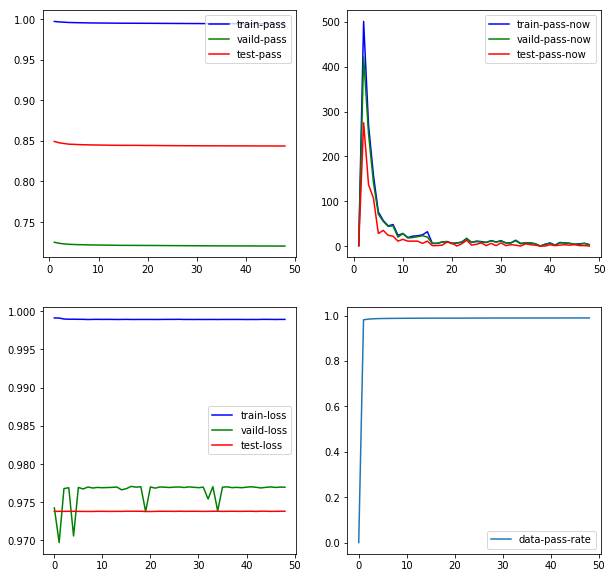

In [89]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

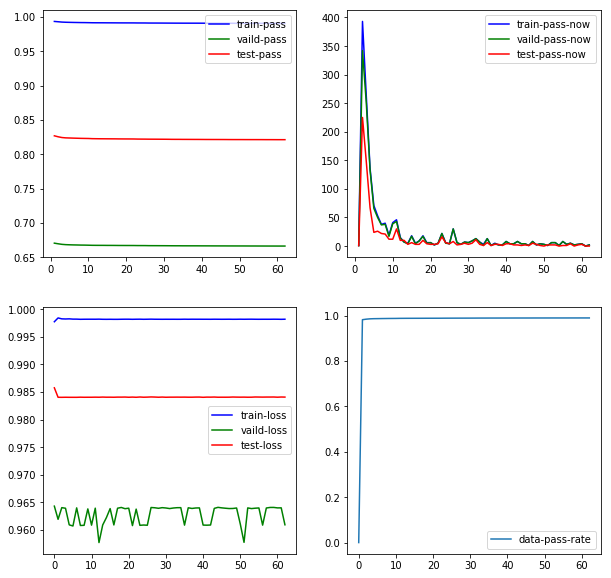

In [18]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [36]:
import numpy as np

import EnhancedForest_multiclass
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

In [29]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_test, y_test, num_class=2, flag="creditcard", isLRStacker=True)
decoForest.set_parameter(criterion="gini", dropout=0.5, min_samples_leaf=10)
decoForest.fit(n_estimators=200, kfold=3, feval=acc_metrix_mult)


2018-01-27 15:26:17 layer: 1
all data ('roc', 0.8695777887007381)
train loss ('roc', 0.8695777887007381)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('roc', 0.86648865878226045)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('roc', 0.8614005647276346)
pass test loss (0, 0)
pass test loss now (0, 1)
1 [p:0/np:0] 

2018-01-27 15:28:31 layer: 2
all data ('roc', 0.86959131698567638)
[p:3356/1:211|n:181768/1:115] 
train loss ('roc', 0.86959131698567638)
pass train loss ('roc', 0.98182249715564462)
pass train loss now ('roc', 0.98182249715564462)
vaild loss ('roc', 0.86342658543365913)
pass vaild loss ('roc', 0.97897588137342817)
pass vaild loss now ('roc', 0.97897588137342817)
test loss ('roc', 0.86743973391480855)
pass test loss ('roc', 0.98038551706173482)
pass test loss now ('roc', 0.98038551706173482)
2 [p:1855/np:97828] 

2018-01-27 15:31:15 layer: 3
all data ('roc', 0.63911391977872767)
[p:213/1:32|n:181555/1:83] 
train loss ('roc', 0.86191989967224703)

In [23]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.99949840995957184,
 [(0, 0.99944825095552903),
  (1, 0.99949840995957184),
  (2, 0.99944825095552903),
  (3, 0.99946831455714613),
  (4, 0.99945828275633763),
  (5, 0.99945828275633763),
  (6, 0.99947834635795474),
  (7, 0.99946831455714613),
  (8, 0.99946831455714613),
  (9, 0.99945828275633763),
  (10, 0.99945828275633763),
  (11, 0.99944825095552903),
  (12, 0.99944825095552903),
  (13, 0.99945828275633763),
  (14, 0.99944825095552903),
  (15, 0.99944825095552903),
  (16, 0.99944825095552903),
  (17, 0.99944825095552903),
  (18, 0.99946831455714613),
  (19, 0.99945828275633763),
  (20, 0.99944825095552903)])

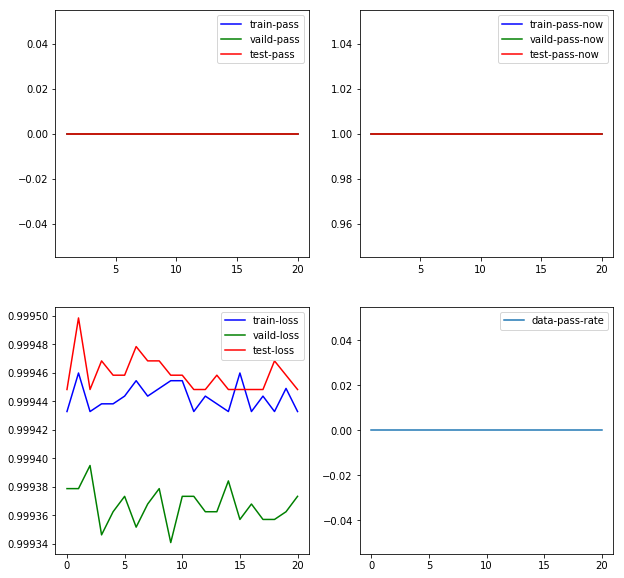

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()